In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel("flood dataset.xlsx")
df.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


<h3>Univariate Analysis</h3>

In [3]:
# Separate columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [4]:
# Add manually if needed (like 'flood' which is numeric but categorical)
if 'flood' in df.columns:
    categorical_cols.append('flood')
    if 'flood' in numerical_cols:
        numerical_cols.remove('flood')

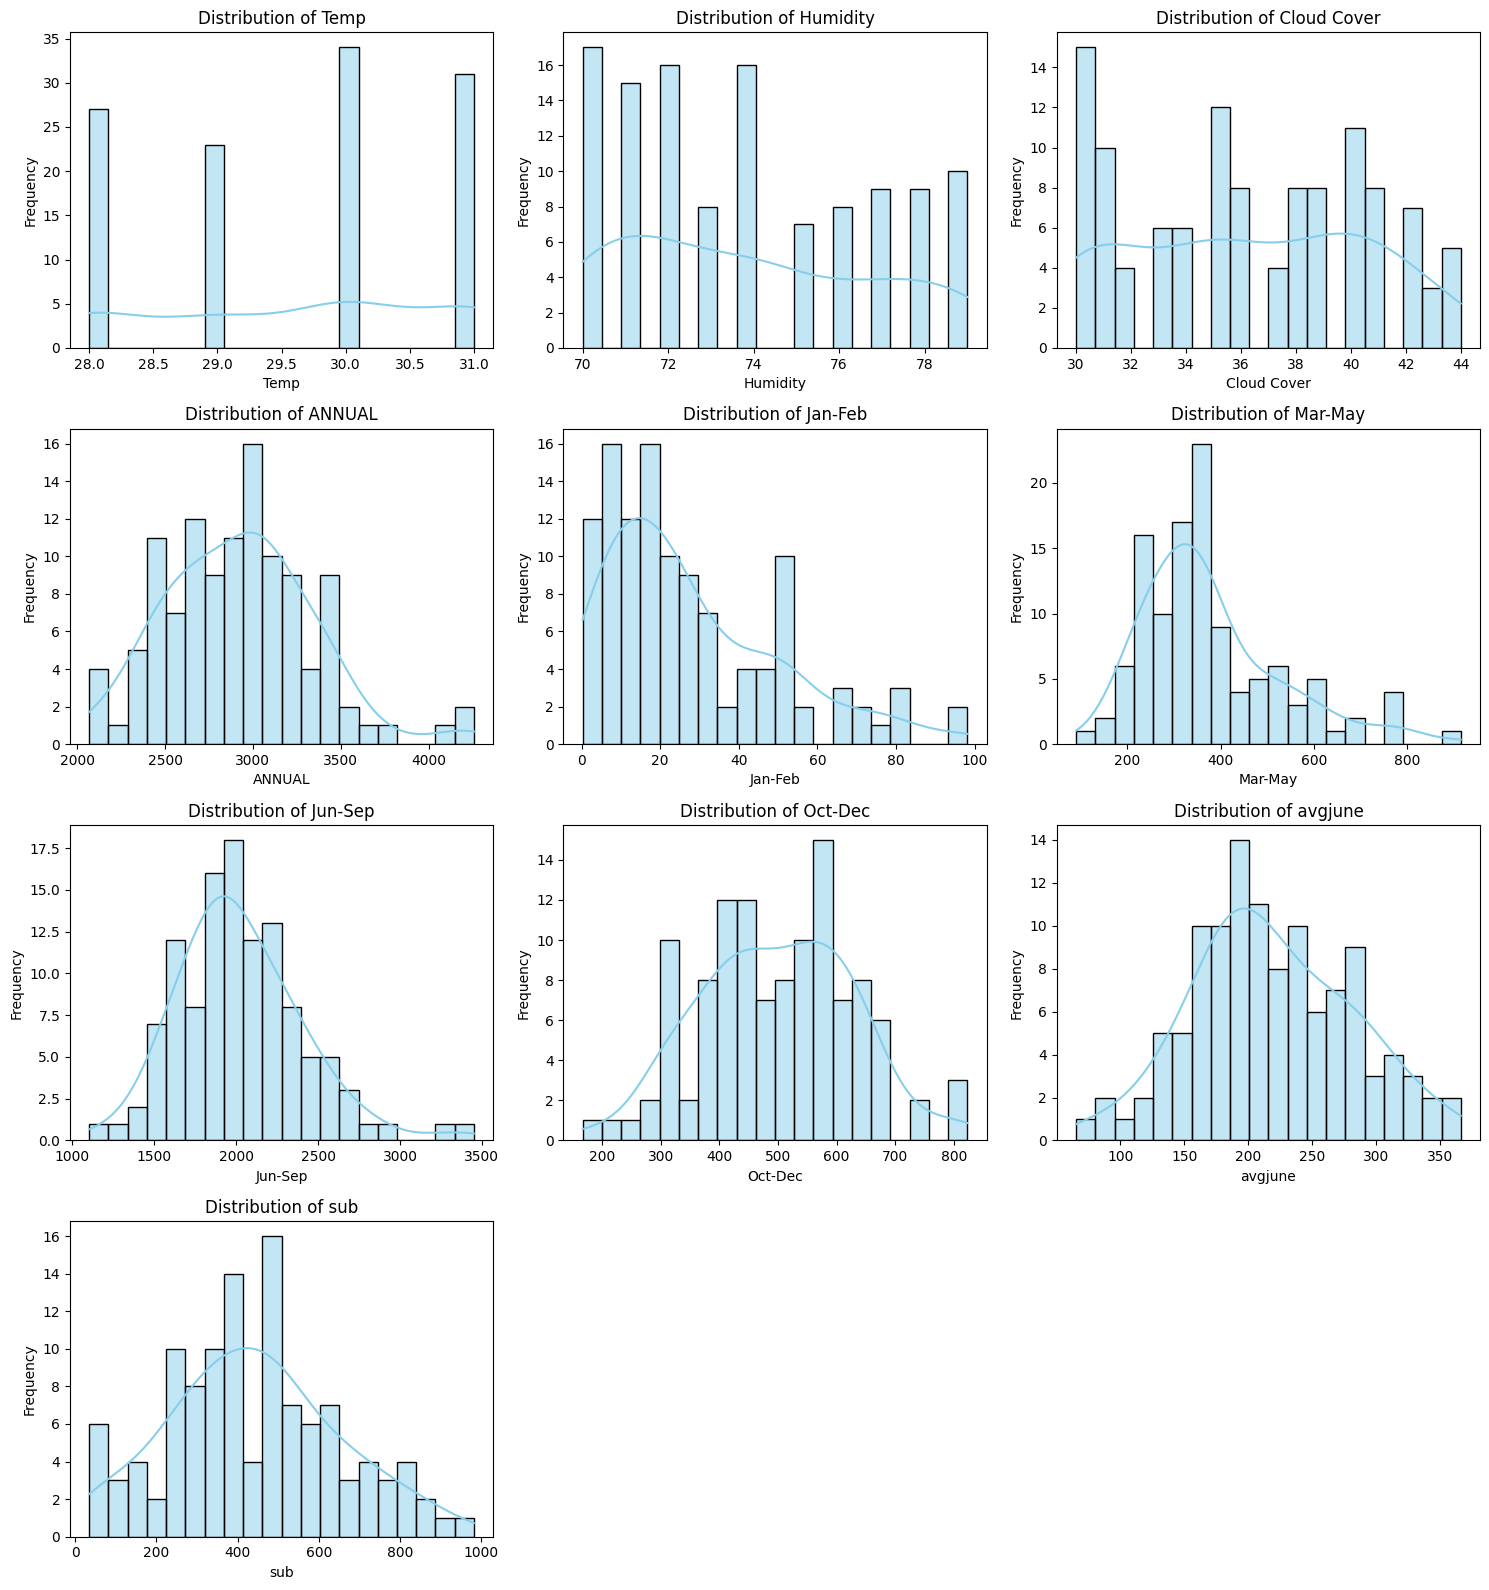

In [5]:
# Univariate Analysis for Numerical Columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'flood' if it's the label
if 'flood' in numerical_cols:
    numerical_cols.remove('flood')

# Set up subplot grid
num_cols = len(numerical_cols)
cols = 3  # plots per row
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(False)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


📊 Univariate Analysis for Categorical Columns


/tmp/ipython-input-6-2683112176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


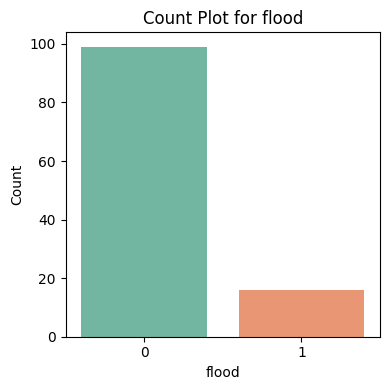

In [6]:
# Univariate Analysis for Categorical Columns
print("📊 Univariate Analysis for Categorical Columns")
for col in categorical_cols:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

<h3>Multivariant Analysis</h3>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


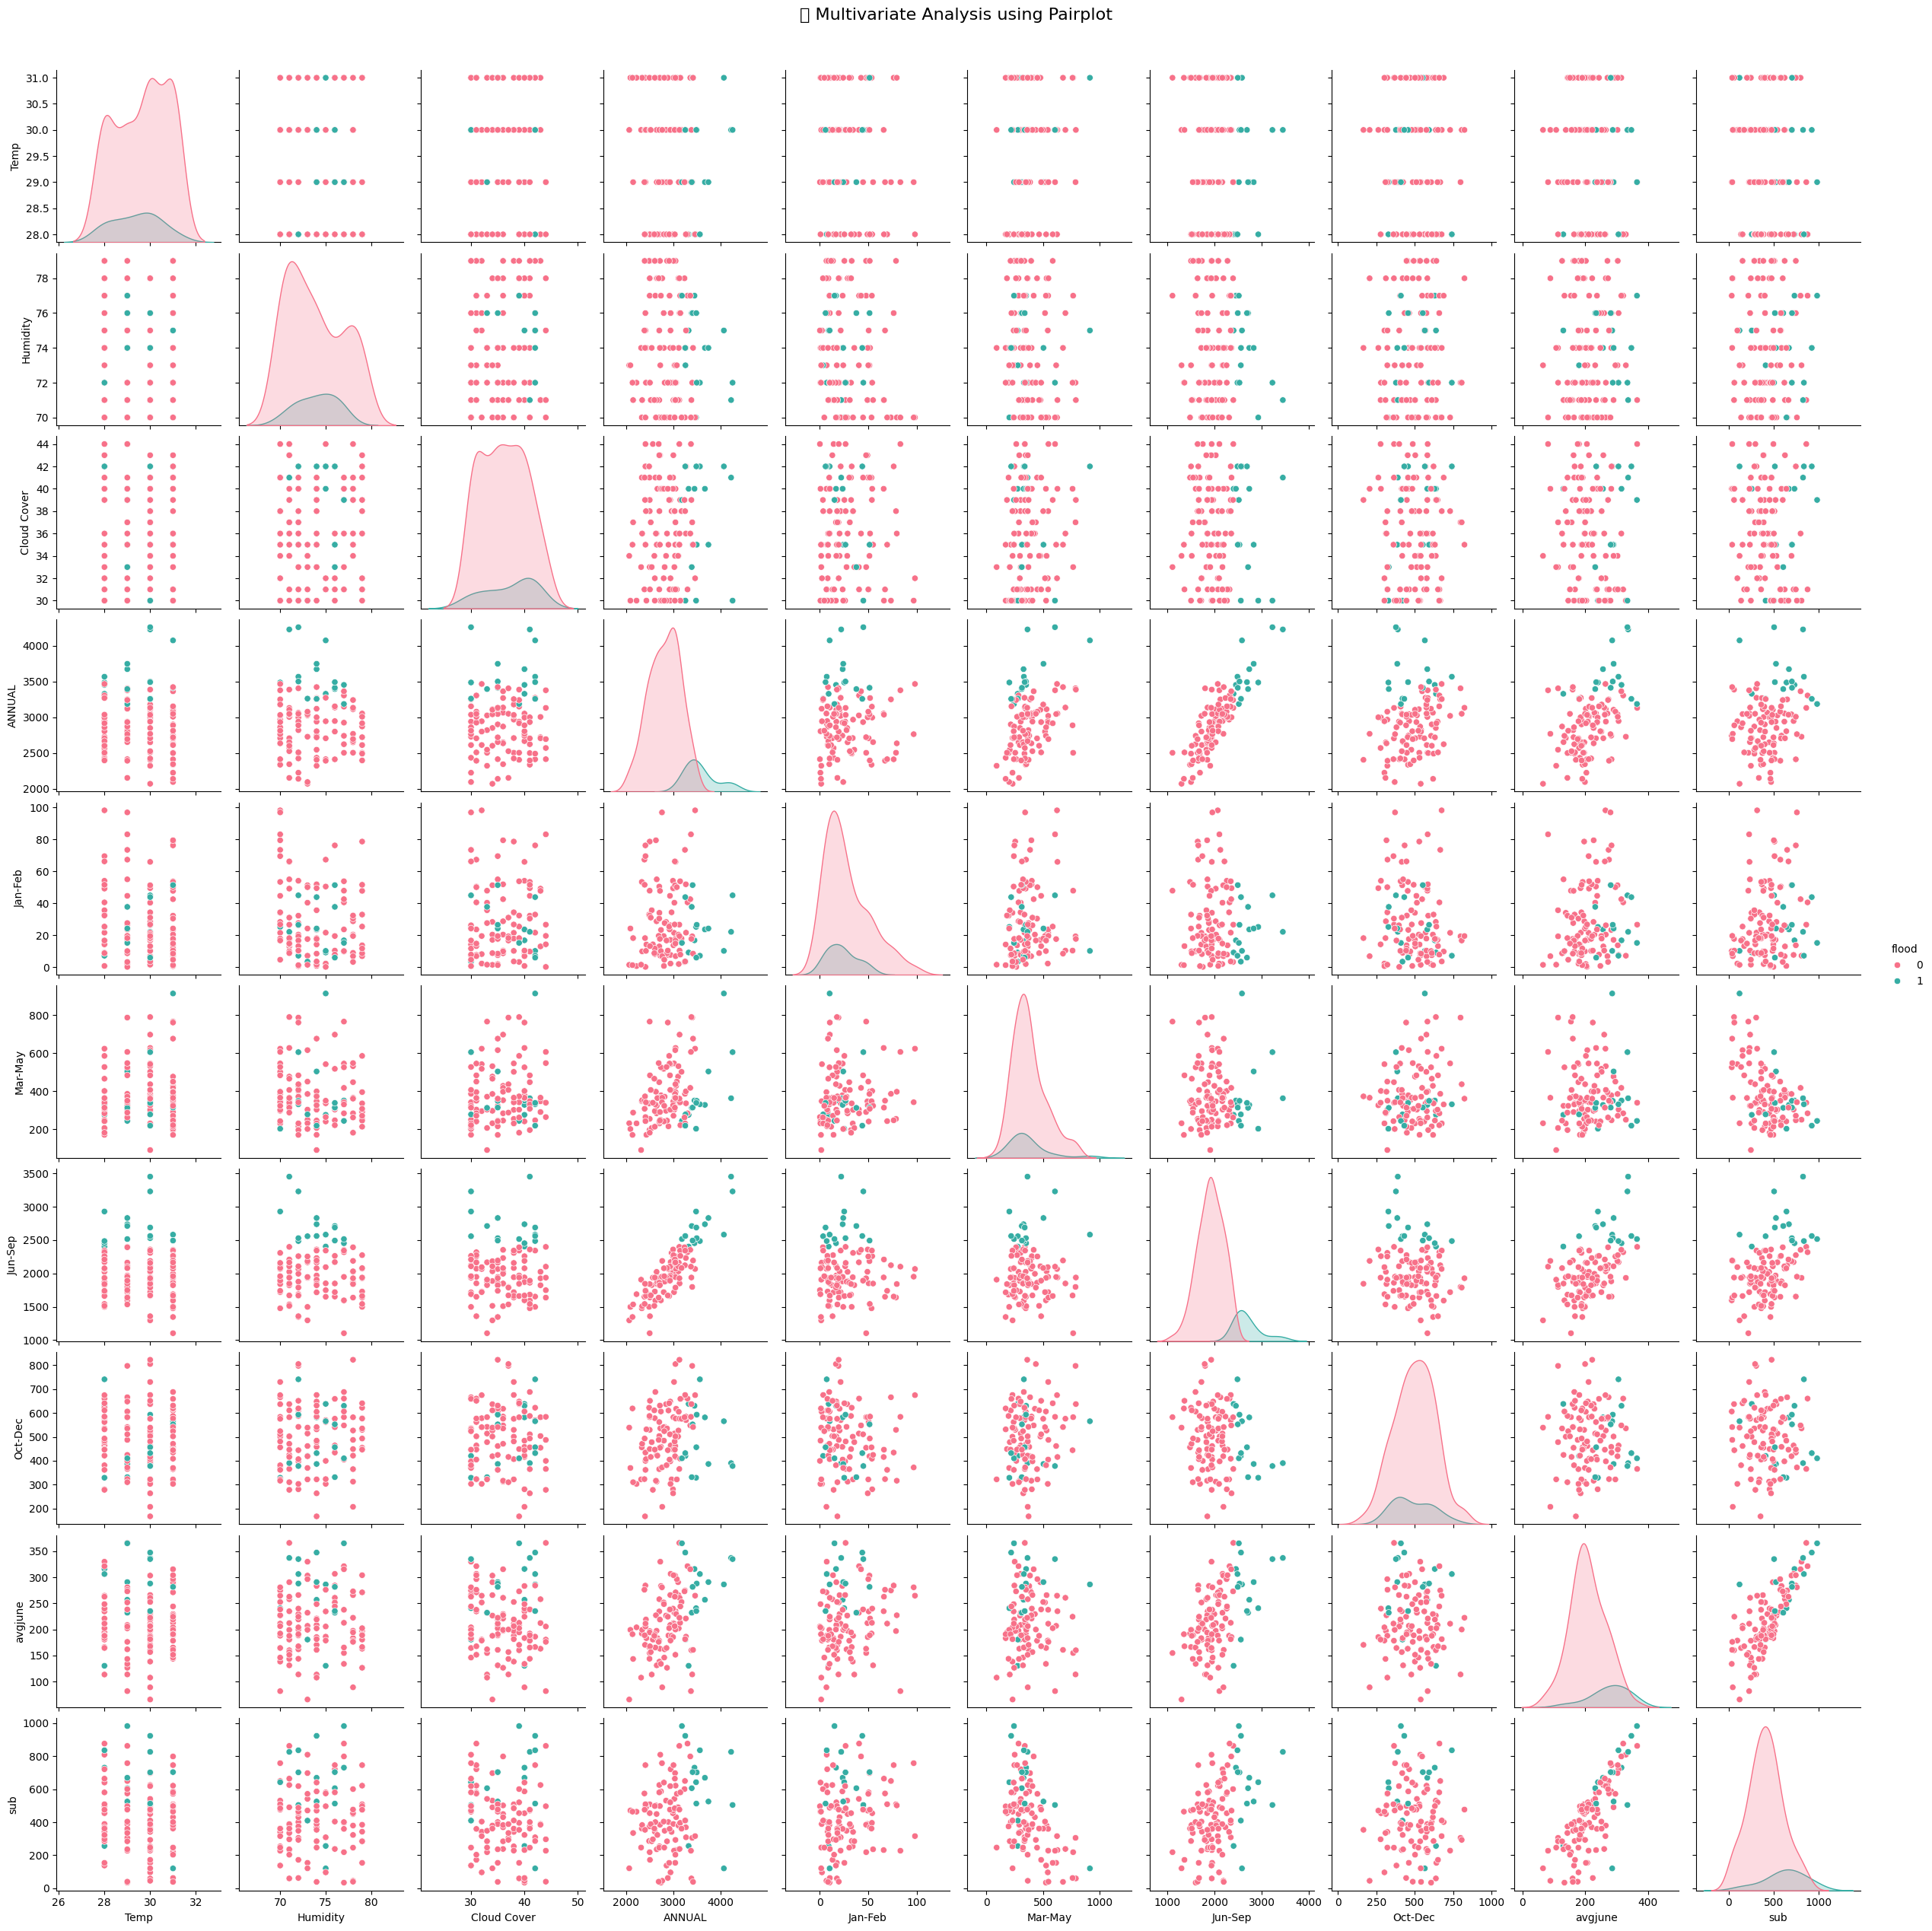

In [7]:

# Select numerical columns again
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Keep 'flood' if you want it to be used for hue (coloring by class)
if 'flood' in df.columns and 'flood' not in numerical_cols:
    numerical_cols.append('flood')

# Create pairplot
sns.pairplot(df[numerical_cols], hue='flood', diag_kind='kde', palette='husl')
plt.suptitle("🔗 Multivariate Analysis using Pairplot", fontsize=16, y=1.02)
plt.show()


<h3>Descriptive Analysis</h3>

In [8]:
df.describe()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


<h1> Data Preprocessing</h1>

In [9]:
# Checking for null values
df.isnull().sum()

,0
Temp,0
Humidity,0
Cloud Cover,0
ANNUAL,0
Jan-Feb,0
Mar-May,0
Jun-Sep,0
Oct-Dec,0
avgjune,0
sub,0


<h3>Checking for Outliers</h3>

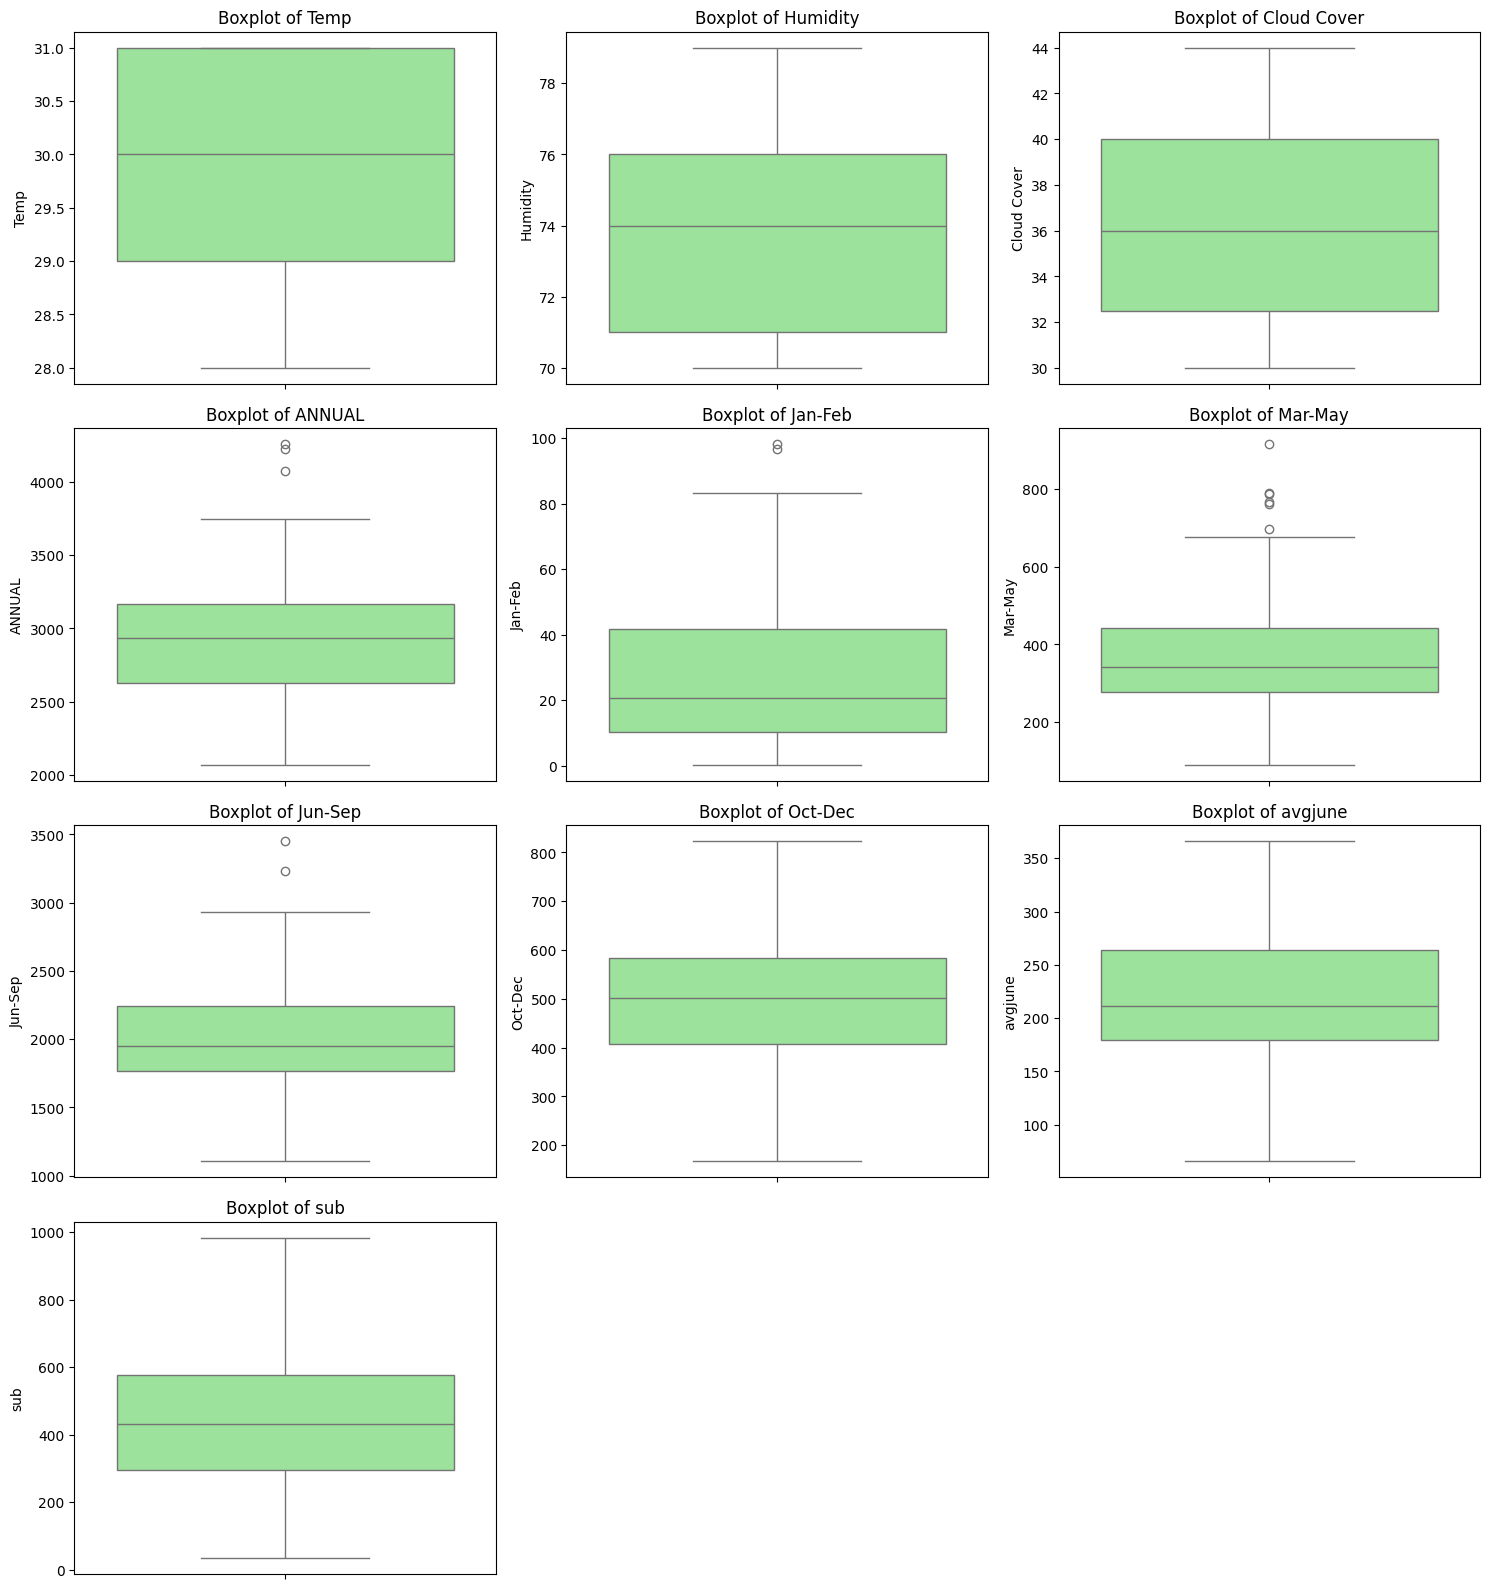

In [10]:
# Boxplots for looking outliers

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'flood' since it's categorical
if 'flood' in numerical_cols:
    numerical_cols.remove('flood')

# Set number of rows and columns for subplots
num_cols = len(numerical_cols)
cols = 3  # 3 boxplots per row
rows = (num_cols + cols - 1) // cols  # auto-calculate rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten in case of single row

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<h3>Removing Outliers</h3>

In [11]:
# Function for removing outliers

def remove_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to all columns
for col in numerical_cols:
    df = remove_outliers_IQR(df, col)


<H3>Now we are free of OUTLIERS</H3>

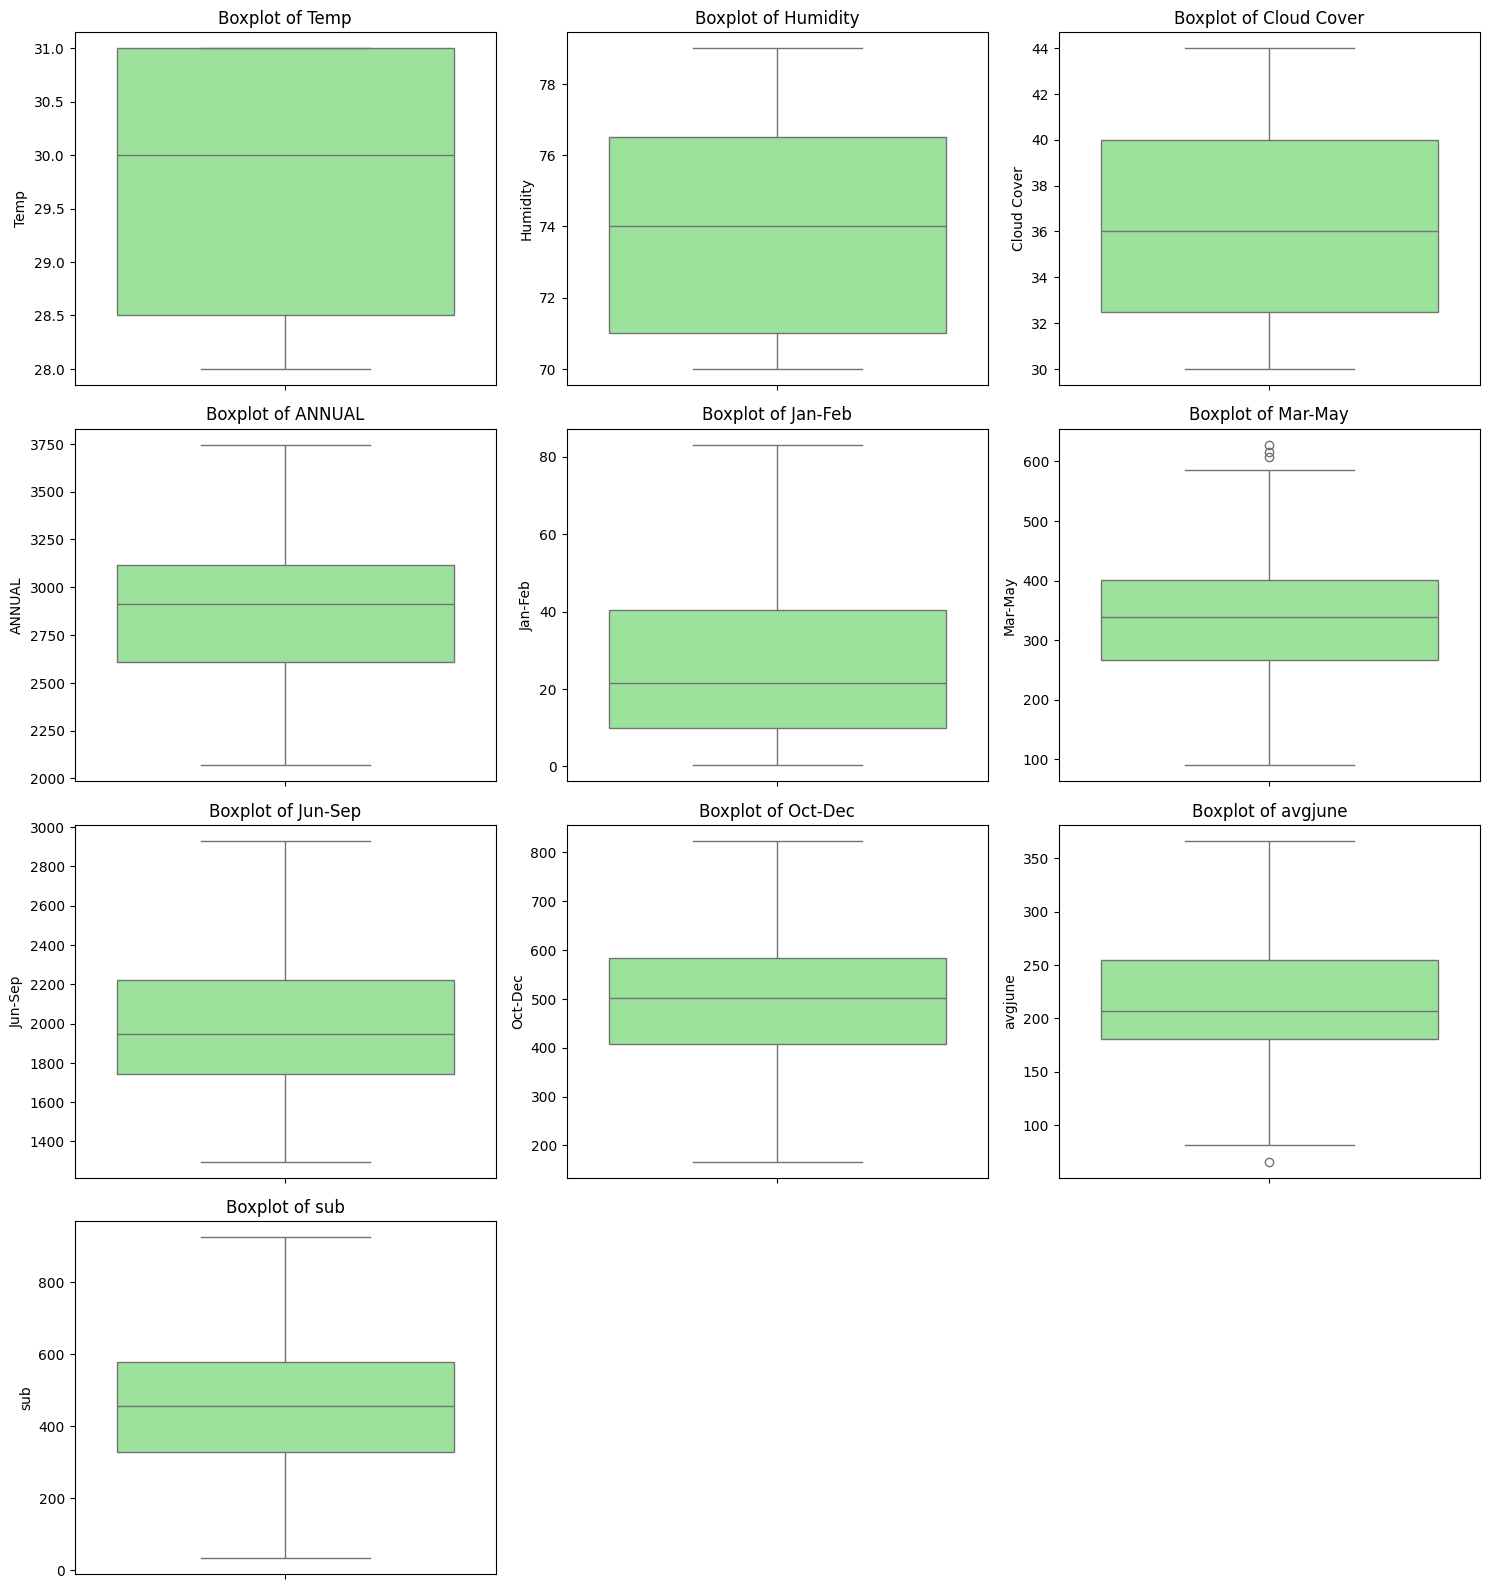

In [12]:
# Seeing again the boxplots for outliers

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'flood' since it's categorical
if 'flood' in numerical_cols:
    numerical_cols.remove('flood')

# Set number of rows and columns for subplots
num_cols = len(numerical_cols)
cols = 3  # 3 boxplots per row
rows = (num_cols + cols - 1) // cols  # auto-calculate rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten in case of single row

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<h3> Splitting the data into independent and dependent features</h3>

In [13]:
# independent variables
x=df.iloc[:,:10]
# dependent variable
y=df.iloc[:,10:]
print(y['flood'].value_counts())  # Replace 'flood' with your label column name


flood
0    91
1    12
Name: count, dtype: int64


<h3>Split the dataset into Train set and Test set</h3>

In [14]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(77, 10) (26, 10) (77, 1) (26, 1)


<h3>Feature scaling</h3>

In [15]:

# Standardization of data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [16]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(77, 10) (26, 10) (77, 1) (26, 1)


In [17]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
#  Decision Tree with GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [20]:

grid_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5)
grid_dt.fit(x_train, y_train)
y_pred_dt = grid_dt.predict(x_test)
print("Optimal Hyperparameters:", grid_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Optimal Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy: 0.9615384615384616
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.50      0.67         2

    accuracy                           0.96        26
   macro avg       0.98      0.75      0.82        26
weighted avg       0.96      0.96      0.96        26

[[24  0]
 [ 1  1]]


In [21]:
#  Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:

grid_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5)
grid_rf.fit(x_train, np.ravel(y_train))
y_pred_rf = grid_rf.predict(x_test)
print("Optimal Hyperparameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Optimal Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.9615384615384616
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.67      1.00      0.80         2

    accuracy                           0.96        26
   macro avg       0.83      0.98      0.89        26
weighted avg       0.97      0.96      0.96        26

[[23  1]
 [ 0  2]]


In [23]:
#  KNN with GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [24]:

grid_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5)
grid_knn.fit(x_train, np.ravel(y_train))
y_pred_knn = grid_knn.predict(x_test)
print("Optimal Hyperparameters:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Optimal Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.9615384615384616
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.67      1.00      0.80         2

    accuracy                           0.96        26
   macro avg       0.83      0.98      0.89        26
weighted avg       0.97      0.96      0.96        26

[[23  1]
 [ 0  2]]


In [25]:

#  Gradient Boosting with GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

In [26]:

grid_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=5)
grid_gb.fit(x_train, np.ravel(y_train))
y_pred_gb = grid_gb.predict(x_test)
print("Optimal Hyperparameters:", grid_gb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Optimal Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

[[24  0]
 [ 0  2]]


In [27]:
from joblib import dump

# Save best estimators
dump(grid_dt.best_estimator_, 'decision_tree_model.save')
dump(grid_rf.best_estimator_, 'random_forest_model.save')
dump(grid_knn.best_estimator_, 'knn_model.save')
dump(grid_gb.best_estimator_, 'gradient_boosting_model.save')


['gradient_boosting_model.save']

In [28]:
from joblib import dump

# Assuming Gradient Boosting is best — replace with the best one in your case
best_model = grid_gb.best_estimator_

# Save the best model to flood.save
dump(best_model, 'flood.save')


['flood.save']